# Gráfico de distribuições contínuas
Nessa prática foram desenvolvidas plotagens de algumas PDFs contínuas para familiarização com o formato de cada uma, e como invocá-las no ambiente de programação (Python especificamente)

### Distribuição LogNormal:

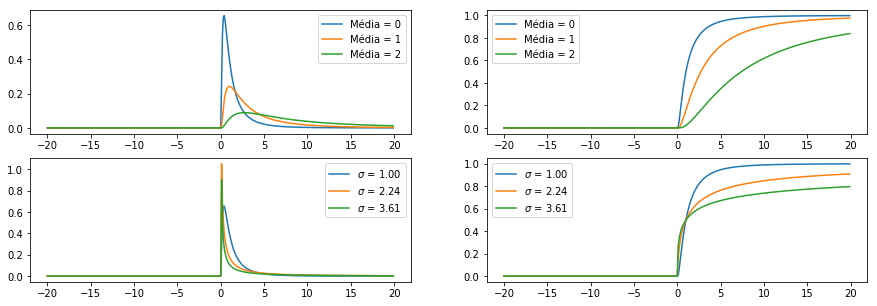

In [1]:
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt
#
# Parâmetros da distribuição
vtMu = [0, 1, 2]                     # Valores de média
vtVar = [1, 5, 13]                   # Valores de variância
x = np.arange(-20,20,0.1)     
#
# Variando a média e plotando os gráficos
plt.figure(1,[15,5])
sigma = np.sqrt(vtVar[0]);
for il in range(0,len(vtMu)):
    mu = vtMu[il]
    plt.subplot(2,2,1)
    plt.plot(x, lognorm.pdf(x,s=sigma,scale=np.exp(mu)), label='Média = {}'.format(mu))
    plt.subplot(2,2,2)
    plt.plot(x, lognorm.cdf(x,s=sigma,scale=np.exp(mu)), label='Média = {}'.format(mu))
# Variando a variância e plotando os gráficos
mu = vtMu[0];
for il in range(0,len(vtVar)):
    sigma = np.sqrt(vtVar[il]);
    plt.subplot(2,2,3)
    plt.plot(x, lognorm.pdf(x,s=sigma,scale=np.exp(mu)), label='$\sigma$ = {:01.2f}'.format(sigma))
    plt.subplot(2,2,4)
    plt.plot(x, lognorm.cdf(x,s=sigma, scale=np.exp(mu)), label='$\sigma$ = {:01.2f}'.format(sigma))
        
plt.subplot(2,2,1)
plt.legend()
plt.subplot(2,2,2)
plt.legend()
plt.subplot(2,2,3)
plt.legend()
plt.subplot(2,2,4)
plt.legend()
plt.show()

### Distribuição Rayleigh

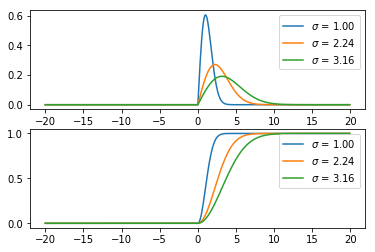

In [3]:
import numpy as np
from scipy.stats import rayleigh
import matplotlib.pyplot as plt
#
# Parâmetros da distribuição
vtVar = [1, 5, 10]                   # Valores de variância
x = np.arange(-20,20,0.1)     
# Variando a variância e plotando os gráficos
for il in range(0,len(vtVar)):
    sigma = np.sqrt(vtVar[il]);
    plt.subplot(2,1,1)
    plt.plot(x, rayleigh.pdf(x,scale=sigma), label='$\sigma$ = {:01.2f}'.format(sigma))
    plt.subplot(2,1,2)
    plt.plot(x, rayleigh.cdf(x,scale=sigma), label='$\sigma$ = {:01.2f}'.format(sigma))
plt.subplot(2,1,1)
plt.legend()
plt.subplot(2,1,2)
plt.legend()
plt.show()

### Distribuição Exponencial

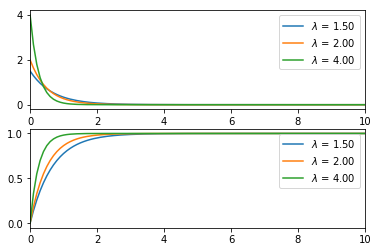

In [5]:

import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt
#
# Parâmetros da distribuição
vtVar = [1.5,2,4]                   # Valores de 'variância'
x = np.arange(-20,20,0.1)     
for il in range(0,len(vtVar)):
    sigma = (vtVar[il]);
    plt.subplot(2,1,1)
    plt.plot(x, expon.pdf(x,scale=1/sigma), label='$\lambda$ = {:01.2f}'.format(sigma))
    plt.xlim([0,10])
    plt.subplot(2,1,2)
    plt.plot(x, expon.cdf(x,scale=1/sigma), label='$\lambda$ = {:01.2f}'.format(sigma))
    plt.xlim([0,10])
        
plt.subplot(2,1,1)
plt.legend()
plt.subplot(2,1,2)
plt.legend()

plt.show()


### Distribuição Nakagami

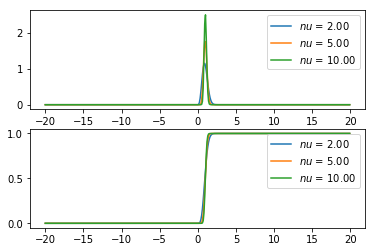

In [13]:
import numpy as np
from scipy.stats import nakagami
import matplotlib.pyplot as plt
#
# Parâmetros da distribuição
vtVar = [2, 5, 10]                   # Valores de variância
x = np.arange(-20,20,0.1)     

mu = vtMu[0];
for il in range(0,len(vtVar)):
    sigma = (vtVar[il]);
    plt.subplot(2,1,1)
    plt.plot(x, nakagami.pdf(x,nu=sigma), label='$nu$ = {:01.2f}'.format(sigma))
   # plt.xlim([0,10])
    plt.subplot(2,1,2)
    plt.plot(x, nakagami.cdf(x,nu=sigma), label='$nu$ = {:01.2f}'.format(sigma))
   # plt.xlim([0,10])

plt.subplot(2,1,1)
plt.legend()
plt.subplot(2,1,2)
plt.legend()

plt.show()


# Aplicação de distribuição Normal
Prática de determinação de vida útil  de um componente, a ser desenvolvida no ambiente Matlab:
* O componente tem vida útil em __média__ igual a 5000h, com __desvio padrão__ de 40h.
* Determinar a probabilidade dessa vida útil ser maior que 5038h, sabendo que essa característica do produto obedece uma PDF Normal.

 Probabilidade pela área = 17.201 %
 Probabilidade pela integral = 17.1056 %


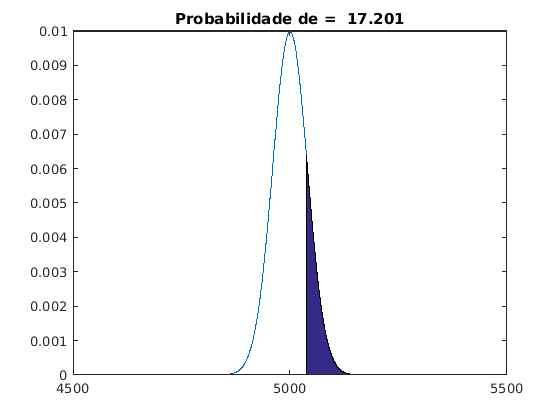

In [5]:
clc;clear all; close all;
%% Parâmetros
mu = 5000;                                                 % Média
sigma = 40;                                                % Desvio padrâo
T=0.1;                                                     % Taxa de amostragem
Ti=3500;
Tf=6500;
x=Ti:T:Tf;                                               % Eixo x       
point=5038;                                              %Ponto de referencia
% Distribuição
DistNorm=normpdf(x,mu,sigma);                           % Distribuição normal    
% Estimação da probabilidade
% Encontra o local que se deseja estimar:
indices = round((point-Ti)/T):round((Tf-Ti)/T);
prob1=sum(DistNorm(indices))*T*100;                     % Probabilidade de um evento ocorrer no intervalo
plot(x,DistNorm);                                       
xlim([4500 5500])
title([ 'Probabilidade de =  ' num2str(prob1)  ]);      % Mostra valor verdadeiro de prob1
hold on;
area(x(indices),DistNorm(indices));                      % Probabilidade 
% Outra maneira de calcular
syms xs fs;
fs = 1/(sqrt(2*pi*sigma^2))*exp(-(xs-mu)^2/(2*sigma^2));
prob2 = eval(int(fs,5038,inf))*100;
disp([' Probabilidade pela área = ' num2str(prob1) ' %']);
disp([' Probabilidade pela integral = ' num2str(prob2) ' %']);

Pode-se ver o grau de semelhança entre o valor retornado pela área do gráfico e o valor retornado pela integral numérica. Esses valores podiam ser ainda mais próximos se a taxa de amostragem fosse maior. Há também uma diferença nos cálculos: enquanto o gráfico tem um número limitado de pontos, (até 6500), a integral é calculada no intervalo $[5038, \infty[$. Ná prática não é gerada uma diferença no resultado, já que a distriuição normal possui valores muito próximos de 0 após a faixa de variância.

# Aplicação de Distribuição Exponencial
Análise de duração de chamadas de duas operadoras de telefonia, obedecendo uma distribuição Exponencial. Prática desenvolvida em ambiente Python:
* taxas (segundo/chamada) em cada operadora: $\lambda_1 = 2$ e $\lambda_2 = 5$.
* Determinar a probabilidade dos assinantes realizarem chamadas com mais de três minutos

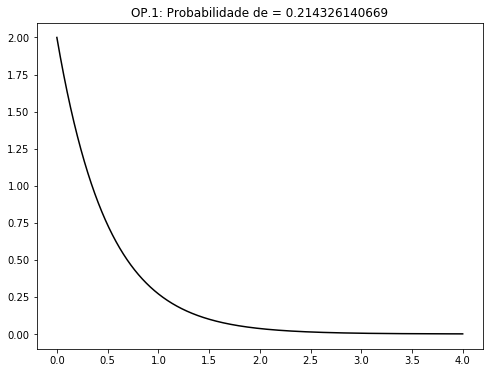

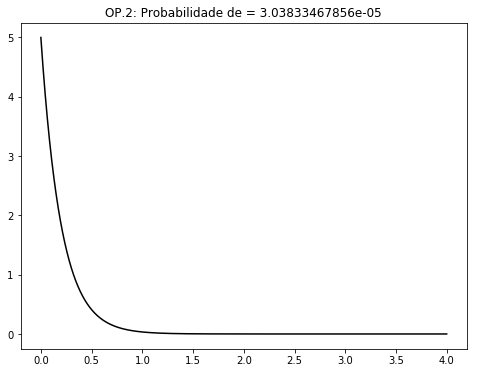

OP.1::::
Probabilidade pela área da PDF = 0.214326140669 %
Probabilidade pela formula da PDF =  0.2479 %
OP.2:::::
Probabilidade pela área da PDF = 3.03833467856e-05 %
Probabilidade pela formula da PDF =  3.05902321e-5 %


In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
# Distribuição
T=0.00001                                      # Taxa de amostragem
my_lambda1=2
my_lambda2=5
Tf=4
x=np.arange(0,Tf+T,T)                        # Eixo x       
ExpNorm1=stats.expon.pdf(x,scale=1/my_lambda1)
ExpNorm2=stats.expon.pdf(x,scale=1/my_lambda2)
# Cálculo da probabilidade
limite_esquerdo = np.round(3/T)
limite_direito = np.round(Tf/T)
indices = np.arange(limite_esquerdo+1,limite_direito,dtype=np.int64)
prob1=np.sum(ExpNorm1[indices])*T*100        # Probabilidade de um evento ocorrer no intervalo
prob1_1=np.sum(ExpNorm2[indices])*T*100        # Probabilidade de um evento ocorrer no intervalo
plt.figure(1,[8,6])
plt.plot(x,ExpNorm1,'k')                                       
plt.title('OP.1: Probabilidade de = ' + str(prob1))      # Mostra valor verdadeiro de prob1
plt.fill_between(x[indices],ExpNorm1[indices],facecolor='midnightblue')
plt.figure(2,[8,6])
plt.plot(x,ExpNorm2,'k')                                       
plt.title('OP.2: Probabilidade de = ' + str(prob1_1))      # Mostra valor verdadeiro de prob1
plt.fill_between(x[indices],ExpNorm2[indices],facecolor='midnightblue')
plt.show()
# calculando diretamente da integral
from sympy import *
init_printing(use_unicode=False, wrap_line=False, no_global=True)
x, f1,f2 = symbols('x f1 f2')
expoente1=-my_lambda1*x
expoente2=-my_lambda2*x
f1 = my_lambda1*exp(-my_lambda1*x)
f2 = my_lambda2*exp(-my_lambda2*x)
prob2 = N(integrate(f1, (x,3,np.Inf)))
prob2_1 = N(integrate(f2, (x,3,np.Inf)))
print("OP.1::::")
print("Probabilidade pela área da PDF = "+str(prob1)+" %")
print("Probabilidade pela formula da PDF =  {:02.4f} %" .format(prob2*100))
print("OP.2:::::")
print("Probabilidade pela área da PDF = "+str(prob1_1)+" %")
print("Probabilidade pela formula da PDF =  {:02.8e} %" .format(prob2_1*100))

# Geração de Variáveis Aleatórias
Gerar amostras da VA que representa a observação do número que aparece na face de um dado não tendencioso, e comparar com a PDF teórica

O evento de lançamento de dado não tendencioso obedece uma distribuição __discreta__ de probabilidades: a distribuição uniforma discreta. Com esse conhecimento, partimos para a geração dessa VA a partir de 3 números diferentes de amostras: 100, 1000 e 100000.

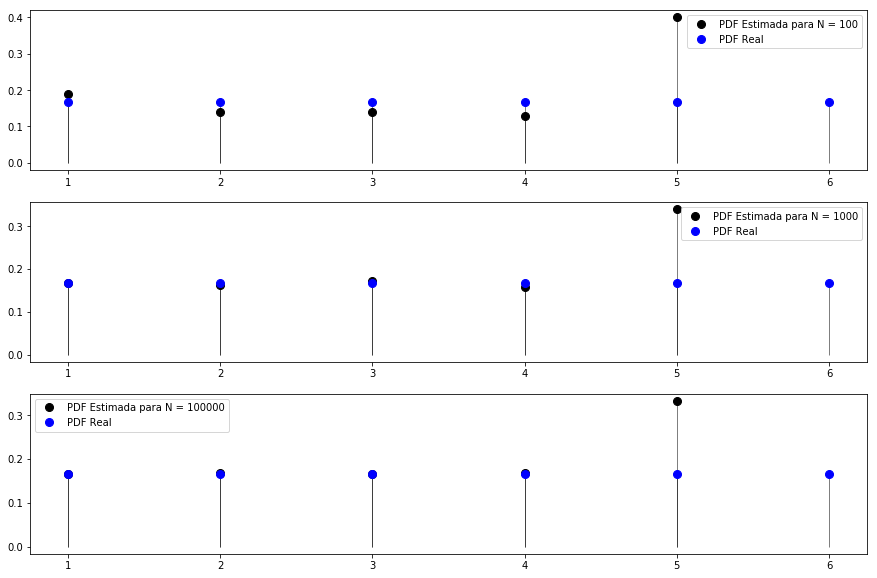

In [75]:
 #Geração de Variável aleatória
import numpy as np
from scipy.stats import randint
import matplotlib.pyplot as plt
#
# Parâmetros da distribuição discreta uniforme
low = 1                                            # Média
high = 7                                          # HIGH parameter (ver documentação randint)
vtnSamples = [1e2, 1e3, 1e5]                       # LOW parameter (randint)
vtSamples = np.random.randint(low,high,int(np.max(vtnSamples))) #Return random integers from low (inclusive) to high (exclusive).
for ik in range(0,len(vtnSamples)):
    nSamples = int(vtnSamples[ik])
    plt.figure(1,[15,10])
    plt.subplot('{}1{}'.format(len(vtnSamples),ik+1))
    # PDF estimada
    binWidth = 1
    vtCurrentS = vtSamples[:nSamples]
    vtBins = np.arange(np.min(vtCurrentS),np.max(vtCurrentS)+1,binWidth)     
    y, x = np.histogram(vtCurrentS,vtBins)                        
    plt.plot(x[0:len(x)-1],y/(binWidth*nSamples),'ko', ms=8, label='PDF Estimada para N = {}'.format(nSamples))
    plt.vlines(x[0:len(x)-1], 0, y/(binWidth*nSamples), colors='k', lw=1, alpha=0.5)
    # PDF real
    plt.plot(x, randint.pmf(x,low,high),'bo', ms=8,label='PDF Real')
    plt.vlines(x, 0, randint.pmf(x, low, high), colors='k', lw=1, alpha=0.5)
    
    plt.legend()
plt.show()

In [76]:
y

array([16631, 16817, 16657, 16694, 33201])

In [62]:
sum(y)

100000